In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [14]:
iris = sns.load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


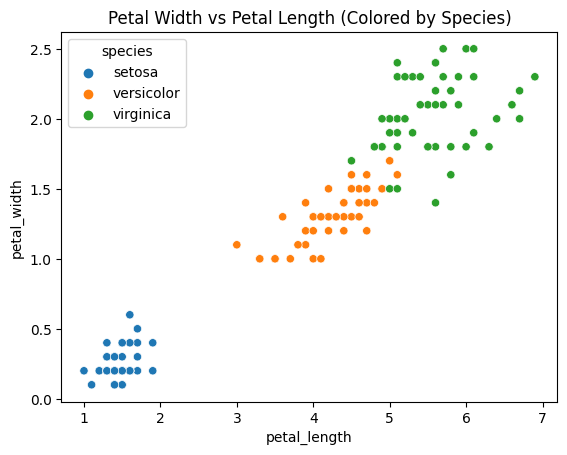

In [15]:
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=iris)

plt.title("Petal Width vs Petal Length (Colored by Species)")
plt.show()

Cluster 1 radius: 1.2986
Cluster 2 radius: 1.3183
Cluster 3 radius: 0.4643


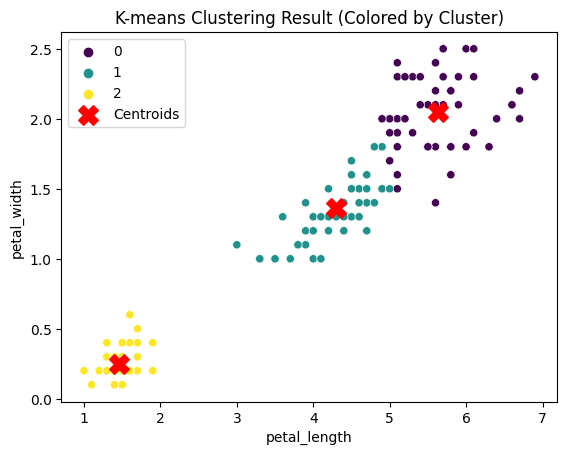

In [11]:
# Use the provided points as initial centroids
initial_centroids = np.array([[0, 4], [1.5, 7], [2, 3]])

# Extract features for clustering
X = iris[["petal_length", "petal_width"]].values

# K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1, random_state=42)
iris["cluster"] = kmeans.fit_predict(X)

# Find the centroids and calculate the radius for each cluster
centroids = kmeans.cluster_centers_
distances = cdist(X, centroids, "euclidean")
iris["distance_to_centroid"] = distances.min(axis=1)

# Display the radius for each cluster
for cluster_id in range(3):
    radius = iris.loc[iris["cluster"] == cluster_id, "distance_to_centroid"].max()
    print(f"Cluster {cluster_id + 1} radius: {radius:.4f}")

# petal width against petal length with color based on the K-means clusters
sns.scatterplot(
    x="petal_length", y="petal_width", hue="cluster", data=iris, palette="viridis"
)

# Highlight the cluster centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1], marker="X", s=200, c="red", label="Centroids"
)

# Show the plot
plt.title("K-means Clustering Result (Colored by Cluster)")
plt.legend()
plt.show()

More clusters didn't change the differences much between groups, but now it's easier to see a clear separation between versicolor and virginica values. 
The essential difference between these two groups stayed the same, but with more clusters, it's easier to tell them apart in graphs.

Cluster 1 radius: 0.8871
Cluster 2 radius: 0.6707
Cluster 3 radius: 0.4643
Cluster 4 radius: 1.1688


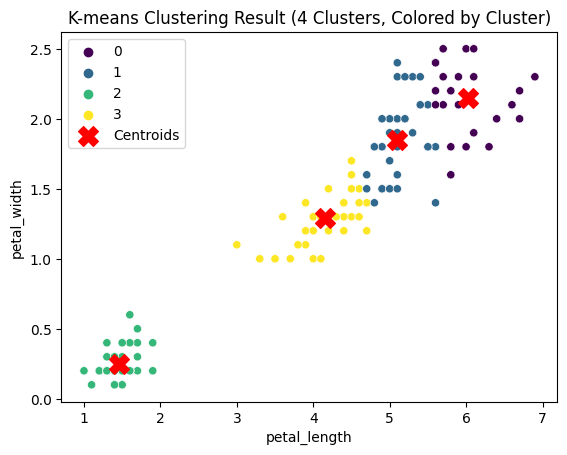

In [10]:
# Use the provided points as initial centroids
initial_centroids = np.array([[0.75, 3], [1.25, 5], [1.5, 2], [2.5, 7]])

# Extract features for clustering
X = iris[["petal_length", "petal_width"]].values

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1, random_state=42)
iris["cluster"] = kmeans.fit_predict(X)

# Find the centroids and calculate the radius for each cluster
centroids = kmeans.cluster_centers_
distances = cdist(X, centroids, "euclidean")
iris["distance_to_centroid"] = distances.min(axis=1)

# Display the radius for each cluster
for cluster_id in range(4):
    radius = iris.loc[iris["cluster"] == cluster_id, "distance_to_centroid"].max()
    print(f"Cluster {cluster_id + 1} radius: {radius:.4f}")

# Plot petal width against petal length with color based on the K-means clusters
sns.scatterplot(
    x="petal_length", y="petal_width", hue="cluster", data=iris, palette="viridis"
)

# Highlight the cluster centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1], marker="X", s=200, c="red", label="Centroids"
)

# Show the plot
plt.title("K-means Clustering Result (4 Clusters, Colored by Cluster)")
plt.legend()
plt.show()

As we increase the number of clusters, similar groups become more noticeable. 
By strategically placing centroids, like centroid number 3 mentioned earlier, it covers elements that were initially close. 
Interestingly, this group might have more subdivisions compared to the original 3-cluster setup. 
This showcases K-means' ability to spot subtle patterns with more clusters. 
However, it emphasizes the need to carefully choose the right number of clusters and interpret results contextually for the specific problem at hand.